In [53]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from scipy.fft import fft2, fftshift
from scipy.ndimage import gaussian_filter
from skimage.feature import peak_local_max
from skimage import io, exposure, filters, img_as_float
from skimage.color import rgb2gray, rgba2rgb
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import convolve

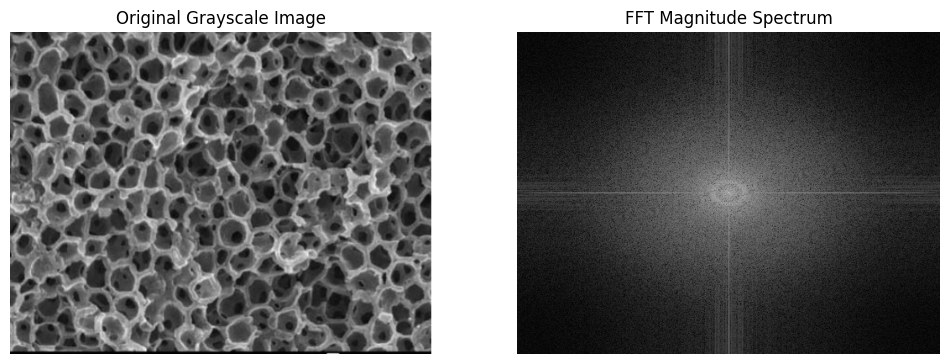

In [54]:

# Load image and ignore the alpha channel if present
image = io.imread('pr.png')[:, :, :3]
gray_image = color.rgb2gray(image)  # Convert to grayscale

# Apply FFT
fft_result = fft2(gray_image)
fft_shifted = fftshift(fft_result)  # Center FFT

# Magnitude spectrum
magnitude_spectrum = np.log(np.abs(fft_shifted) + 1)  # Adding 1 to avoid log(0)

# Display the results
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('FFT Magnitude Spectrum')
plt.axis('off')

plt.show()

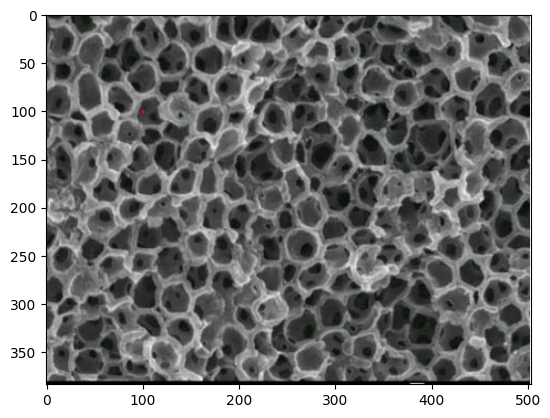

In [61]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load your image
image_path = 'pr.png'
img = Image.open(image_path)
img_np = np.array(img)

# Coordinates to place the marker (choose a point of interest)
x, y = 95, 100  # Example coordinates

# Draw a circle at (x, y) with radius corresponding to the average pore size
fig, ax = plt.subplots()
ax.imshow(img_np)
circle = plt.Circle((x, y), 2/2, color='red', fill=False)
ax.add_patch(circle)
plt.show()


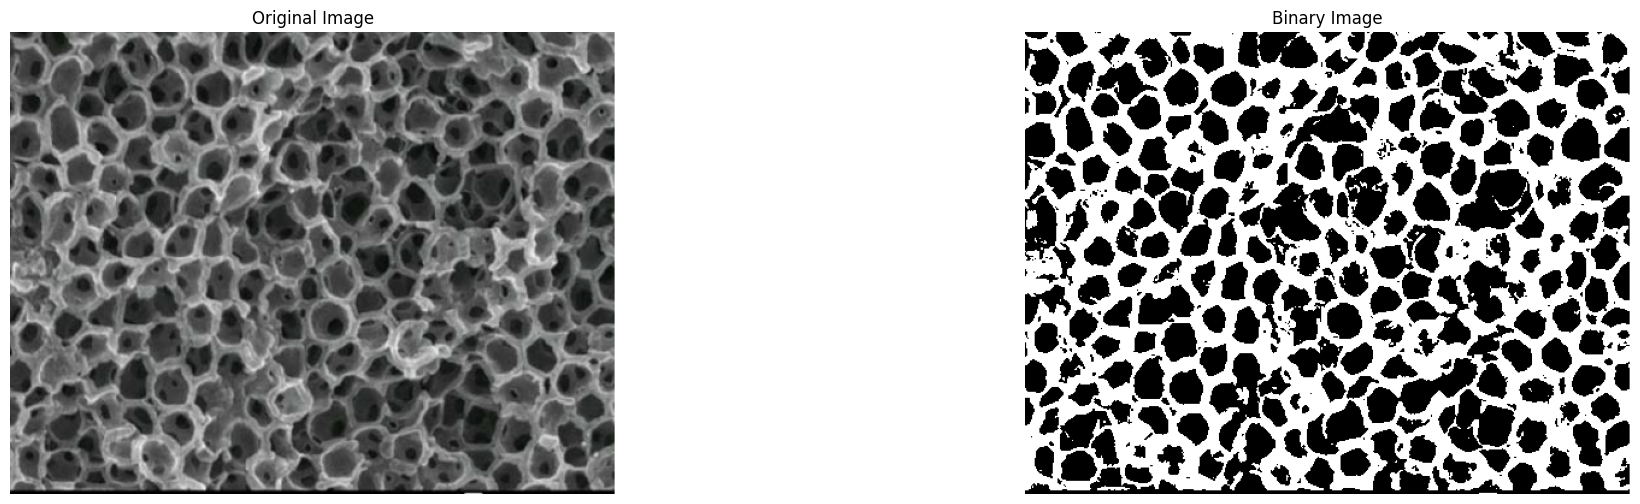

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, exposure
from scipy.fft import fft2, fftshift
from scipy.ndimage import gaussian_filter
from scipy.ndimage import label, center_of_mass

# Load the image
image = io.imread('pr.png')[:, :, :3]  # Assuming RGB image

# Convert to grayscale
gray_image = color.rgb2gray(image)

# Enhance contrast using histogram equalization
equalized_image = exposure.equalize_adapthist(gray_image)

# Threshold the image to create a binary image
thresh = filters.threshold_otsu(equalized_image)
binary_image = equalized_image > thresh

# Apply FFT
fft_image = fft2(binary_image)
fft_shifted = fftshift(fft_image)
magnitude_spectrum = np.abs(fft_shifted)

# Smooth the magnitude spectrum to analyze it more easily
smoothed_spectrum = gaussian_filter(magnitude_spectrum, sigma=5)


# Display the original, binary, and FFT images with results
fig, ax = plt.subplots(1, 2, figsize=(24, 6))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(binary_image, cmap='gray')
ax[1].set_title('Binary Image')
ax[1].axis('off')



plt.show()


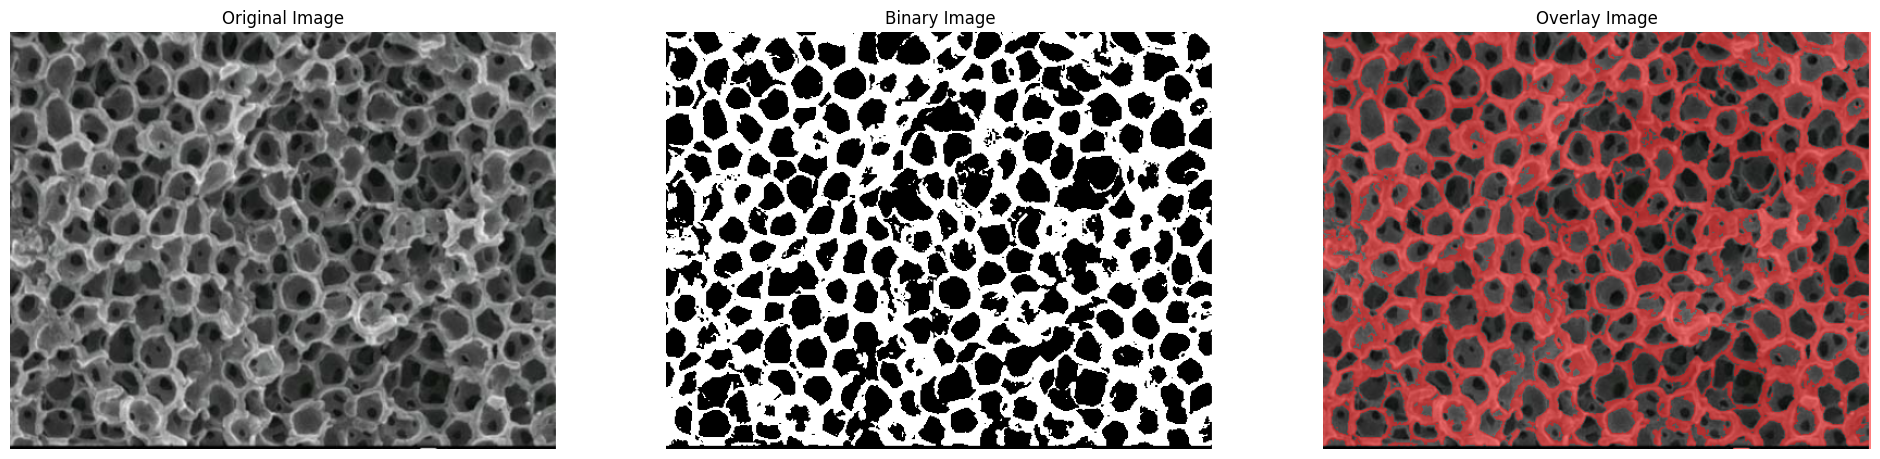

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, exposure
from scipy.fft import fft2, fftshift
from scipy.ndimage import gaussian_filter

# Load the image
image = io.imread('pr.png')[:, :, :3]  # Assuming RGB image

# Convert to grayscale
gray_image = color.rgb2gray(image)

# Enhance contrast using histogram equalization
equalized_image = exposure.equalize_adapthist(gray_image)

# Threshold the image to create a binary image
thresh = filters.threshold_otsu(equalized_image)
binary_image = equalized_image > thresh

# Create a red overlay where the binary image is True
overlay_image = image.copy()
overlay_image[binary_image] = [255, 0, 0]  # Red color

# Use alpha blending to combine the original image and the overlay
alpha = 0.5
blended_image = image * (1 - alpha) + overlay_image * alpha
blended_image = blended_image.astype(np.uint8)

# Display the original, binary, and overlay images
fig, ax = plt.subplots(1, 3, figsize=(24, 6))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(binary_image, cmap='gray')
ax[1].set_title('Binary Image')
ax[1].axis('off')

ax[2].imshow(blended_image)
ax[2].set_title('Overlay Image')
ax[2].axis('off')

plt.show()


Estimated Average Pore Size (in pixels): 71.75


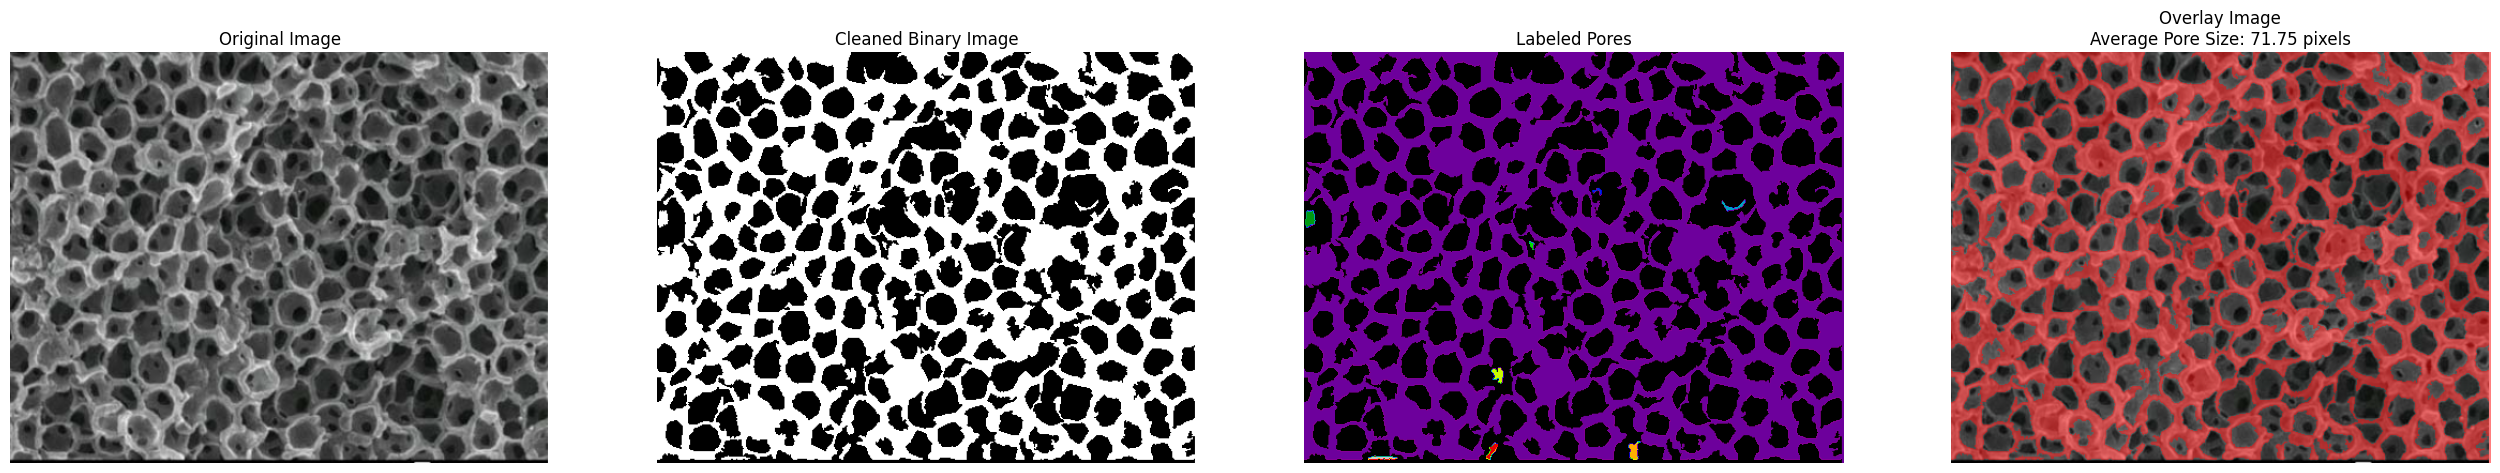

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, exposure, measure, morphology

# Load the image
image = io.imread('pr.png')[:, :, :3]  # Assuming RGB image

# Convert to grayscale
gray_image = color.rgb2gray(image)

# Enhance contrast using histogram equalization
equalized_image = exposure.equalize_adapthist(gray_image)

# Threshold the image to create a binary image
thresh = filters.threshold_otsu(equalized_image)
binary_image = equalized_image > thresh

# Remove small objects and fill holes to clean the binary image
cleaned_binary_image = morphology.remove_small_objects(binary_image, min_size=20)
cleaned_binary_image = morphology.remove_small_holes(cleaned_binary_image, area_threshold=100)

# Label the connected regions (pores)
labeled_image, num_features = measure.label(cleaned_binary_image, connectivity=2, return_num=True)

# Measure properties of labeled regions
properties = measure.regionprops(labeled_image)

# Filter out very small or very large objects that are not pores
min_size = 20
max_size = 500
pore_sizes = [prop.area for prop in properties if min_size < prop.area < max_size]

# Calculate average pore size
average_pore_size = np.mean(pore_sizes) if pore_sizes else 0

# Print the average pore size
print("Estimated Average Pore Size (in pixels):", average_pore_size)

# Create a red overlay where the binary image is True
overlay_image = image.copy()
overlay_image[cleaned_binary_image] = [255, 0, 0]  # Red color

# Use alpha blending to combine the original image and the overlay
alpha = 0.5
blended_image = image * (1 - alpha) + overlay_image * alpha
blended_image = blended_image.astype(np.uint8)

# Display the original, binary, labeled, and overlay images
fig, ax = plt.subplots(1, 4, figsize=(32, 8))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(cleaned_binary_image, cmap='gray')
ax[1].set_title('Cleaned Binary Image')
ax[1].axis('off')

ax[2].imshow(labeled_image, cmap='nipy_spectral')
ax[2].set_title('Labeled Pores')
ax[2].axis('off')

ax[3].imshow(blended_image)
ax[3].set_title('Overlay Image\nAverage Pore Size: {:.2f} pixels'.format(average_pore_size))
ax[3].axis('off')

plt.show()
